<a href="https://colab.research.google.com/github/bayubagusbagaswara/CreditRiskPrediction/blob/master/CreditRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Perusahaan Lending adalah sebuah perusahaan yang bergerak dalam bidang peminjaman uang. Dimana operasional bisnisnya sangat bergantung dengan kelancaran aliran dana (cashflow). Selama ini perusahaan merasa adanya ketidakefektifan dalam penentuan calon debitur, karena laporan keuangan mengalami kredit macet (gagal bayar). Hal ini menyebabkan perusahaan mengalami kerugian yang cukup signifikan. Data Science diharapkan mampu menganalisis data dan melakukan prediksi kedepan berdasarkan data yang telah disediakan oleh perusahaan. Data tersebut terdiri dari pinjaman yang diterima dan pinjaman yang ditolak. Pada akhirnya, perusahaan mengharapkan terknologi dapat memberikan solusi untuk masalah bisnisnya, dalam hal ini adalah memprediksi risiko kredit. Tujuannya adalah untuk mengurangi risiko gagal bayar dan meningkatkan keuntungan perusahaan itu sendiri.

## Analytic Approach

Pada kasus penentuan calon debitur yang disetujui maupun ditolak pengajuan pinjamannya sangat erat kaitannya dengan probabilitas. Oleh karena itu, dalam perancangan model machine learning kita akan menggunakan algoritma Logistic Regression dan Random Forest.

# Data Requirement

Tahap ini kita akan mulai dengan menyiapkan data dan menentukan target variable sebagai data utama pada pembuatan model machine learning nanti.

## Preparing Data

### Open Drive for File Location

File dataset kita berlokasi di drive, sehingga kita harus menyambungkan dengan drive agar bisa membaca file datasetnya.

In [1]:
# open drive for file location
from google.colab import drive
drive.mount('/content/drive')
%cd /content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


### Import Libraries

Lakukan importing library apa saja yang akan kita butuhkan.

In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 1000)

### Read Dataset

In [3]:
# read dataset
df_loan_raw = pd.read_csv('/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv', low_memory=False)

### Copy Dataframe

In [4]:
# copy dataframe
df_loan_ori = df_loan_raw.copy()

### Check Info Dataframe

In [5]:
# check info dataframe
df_loan_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
# check the top 5 data
df_loan_ori.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and f

## Define Target Variable / Labeling

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka dalam melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut.

Dalam dataset ini, variabel loan_status adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [7]:
# check feature loan_status
df_loan_ori["loan_status"].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [8]:
# check persentase loan_status
df_loan_ori.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Dapat dilihat bahwa variabel `loan_status` memiliki beberapa nilai:

- Current artinya pembayaran lancar.
- Charged Off artinya pembayaran macet sehingga dihapus bukukan.
- Late artinya pembayaran telat dilakukan.
- In Grace Period artinya dalam masa tenggang atau keringanan masa jatuh tempo. 
- Fully Paid artinya pembayaran lunas.
- Default artinya pembayaran macet.
- Does not meet the credit policy artinya tidak sesuai ketentuan perusahaan, meskipun kredit berhasil dibayar ataupun gagal bayar.

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan **bad loan** (peminjam yang buruk) atau **good loan** (peminjam yang baik).

Definisi bad dan good loan terkadang bisa berbeda tergantung dari kebutuhan bisnis. Pada contoh ini, saya menggunakan keterlambatan pembayaran dan yang lebih buruk dari itu sebagai penanda bad loan. Untuk nilai `In Grace Period` kita kasih toleransi menjadi goog loan, karena mungkin debitur mampu melunasi pinjamannya saat masa tenggang. Nilai `Does not meet the credit policy. Status:Fully Paid` juga kita kasih toleransi untuk masuk dalam kategori good loan. Apabila dari sisi bisnis menyatakan bahwa kedua nilai tersebut juga berpengaruh merugikan, maka bisa dimasukkan kedalam kategori bad loan untuk kedepannya. Atau bisa dikatakan dalam menentukan status good dan bad itu berdasarkan kebijakan perusahaan. Ada perusahaan yang menerapkan aturan yang ketat, sehingga setiap pembayaran kredit yang tidak sesuai dengan perjanjian awal, maka itu dapat dikategorikan sebagai bad loan.

Good Loan:
- Current
- Fully Paid

Bad Loan:
- In Grace Period
- Late (16-30 days)
- Late (31-120 days)
- Default
- Charged Off
- Does not meet the credit policy. Status:Fully Paid
- Does not meet the credit policy. Status:Charged Off

In [9]:
df_loan = df_loan_ori.copy()

In [10]:
# changed data loan_status
good_status = ["Current", "Fully Paid"]
bad_status = [
    "In Grace Period",
    "Late (16-30 days)",
    "Late (31-120 days)",
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]

In [11]:
# replace load status with label 1 or 0
df_loan["loan_status"] = np.where(df_loan["loan_status"].isin(bad_status), 1, 0)

In [12]:
# persentase loan for good or bad status
df_loan["loan_status"].value_counts(normalize=True)*100

0    87.707089
1    12.292911
Name: loan_status, dtype: float64

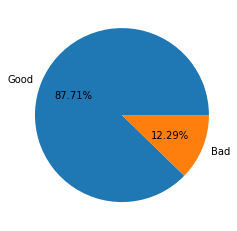

In [13]:
# create pie chart loan_status
dfg = df_loan.groupby("loan_status").agg({'id':'count'}).reset_index()
dfg.columns = ["loan_status", "total"]
dfg["%"] = round(dfg["total"]*100/sum(dfg['total']), 3)
# colors = ['#1f77b4', '#ff7f0e']
plt.pie(dfg["total"], labels=["Good", "Bad"], autopct='%.2f%%')
plt.show()

Setelah melakukan flagging terhadap bad/good loan, dapat dilihat bahwa jumlah individu yang ditandai sebagai bad loan jauh lebih sedikit daripada good loan. Hal ini menyebabkan problem ini menjadi problem `imbalanced dataset`.

# Data Collection

Pada tahap data collection ini kita akan melakukan pengumpulan data. Memilih data yang akan digunakan untuk proses analisis dan sesuai dengan data requirement.

## Separate Category Feature and Number Feature

Kita akan memisahkan feature atau kolom yang bertipe data categorical (object) dan numerical (number).

In [14]:
# pisahkan feature numerics dan categorics kedalam array
numerics = [] 
categorics = []

for i in df_loan.columns:
  if df_loan[i].dtype == 'object':
    categorics.append(i)
  else:
    numerics.append(i)

# print
print('Total Numerics = ', len(numerics))
print('--------------------------------')
print('Numerics = ', numerics)
print('--------------------------------')
print('Total Categorics = ', len(categorics))
print('--------------------------------')
print('Categorics = ', categorics)

Total Numerics =  54
--------------------------------
Numerics =  ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
--------------------------------
Total Categoric

### Statistical Summary : Categorical Features

In [15]:
# describe all features categorics
df_loan[categorics].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
pymnt_plan,466285,2,n,466276
url,466285,466285,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,1


### Statictical Summary : Numerical Features

In [16]:
df_loan[numerics].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
loan_status,466285.0,1.229291e-01,3.283562e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


## Observation Category Feature and Number Feature

- Feature `Unammed: 0` dihapus karena dia merepresentasikan nomor index dan tidak memberikan informasi apapun.
- Feature yang terlalu banyak nilai unik tidak akan kita gunakan. Seperti `id` dan `member_id` dan kedua feature tersebut tidak ada data duplikat, artinya setiap baris sudah mewakili satu individu.
- Feature yang berupa data text juga akan kita hapus, seperti feature `desc`.
- Feature `zip_code` akan kita hapus karena 3 digit angka dibelakangnya disensor.
- Feature `sub_grade` juga kita hapus karena sudah memiliki kolom yang mirip, yaitu `grade`.

## Drop Null and Unique Features


Kita akan melakukan drop (menghapus) feature yang isi datanya semua null. Tujuannya adalah untuk memudahkan proses analisis selanjutnya, karena tidak mengandung informasi yang signifikan.

In [17]:
# buat data statistik untuk mengetahui unique dan missing rate masing-masing feature
data_stat = pd.DataFrame()
data_stat.index = df_loan.columns
data_stat["unique_value"] = df_loan.nunique()
data_stat["missing_rate"] = df_loan.isna().mean()
data_stat["dtype"] = df_loan.dtypes
data_stat

,unique_value,missing_rate,dtype
Unnamed: 0,466285,0.000000,int64
id,466285,0.000000,int64
member_id,466285,0.000000,int64
loan_amnt,1352,0.000000,int64
funded_amnt,1354,0.000000,int64
funded_amnt_inv,9854,0.000000,float64
term,2,0.000000,object
int_rate,506,0.000000,float64
installment,55622,0.000000,float64
grade,7,0.000000,object


In [18]:
# kolom yang semua datanya hilang
missing_col = data_stat[data_stat["missing_rate"] == 1].index.to_list()
print("Kolom yang semua datanya hilang: ")
print(missing_col)
print()

# Kolom yang terlalu unik
varied_col = data_stat[data_stat["unique_value"] == df_loan.shape[0]].index.to_list()
print("Kolom yang terlalu unik: ")
print(varied_col)
print()

Kolom yang semua datanya hilang: 
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

Kolom yang terlalu unik: 
['Unnamed: 0', 'id', 'member_id', 'url']



In [19]:
# Drop feature missing_col dan varied_col
df_loan.drop(columns=missing_col, inplace=True)
df_loan.drop(columns=['Unnamed: 0', 'member_id', 'url'], inplace=True)

print("Shape = ", df_loan.shape)

Shape =  (466285, 55)


In [20]:
# drop features desc, zipcode, dan sub_grade
to_drop = ['desc', 'sub_grade', 'zip_code']

df_loan.drop(columns=to_drop, inplace=True)

print("Shape = ", df_loan.shape)

Shape =  (466285, 52)


# Exploratory Data Analysis

In [21]:
# copy dulu dataframe df_loan ke data
data = df_loan.copy()
data.shape

(466285, 52)

## Separate Categorical Feature and Numerical Feature

In [22]:
# memisahkan feature numerical dengan categorical
numerics = []
categorics = []

for i in df_loan.columns:
  if data[i].dtype == 'object':
    categorics.append(i)
  else:
    numerics.append(i)

print('Total Numerics = ', len(numerics))
print('--------')
print('Feature Numerics = ', numerics)
print('--------')
print('Total Categorics = ', len(categorics))
print('--------')
print('Feature Categorics = ', categorics)

Total Numerics =  35
--------
Feature Numerics =  ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
--------
Total Categorics =  17
--------
Feature Categorics =  ['term', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


### Statistical Summary : Categorical Features

In [23]:
data[categorics].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
pymnt_plan,466285,2,n,466276
purpose,466285,14,debt_consolidation,274195
title,466265,63099,Debt consolidation,164075


Dapat dilihat feature yang bertipe numerik memiliki banyak jenis data. Langkah selanjutnya kita akan memodifikasi data-data tersebut.

**Observasi:**

* Untuk feature `issue_d`, `earlier_cr_line`, `last_pymnt_d`, `next_pymnt_d`, dan `last_credit_pull_d` tipe datanya dapat diubah menjadi datetime
* Label pada feature `initial_list_status` dapat diubah kedalam bentuk biner
* Label 'ANY' dan 'NONE' pada feature `home_ownership` dapat digabung dengan label 'OTHER'

### Statistical Summary : Numerical Features

In [24]:
data[numerics].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
loan_status,466285.0,1.229291e-01,3.283562e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


## Univariate Analysis : Categorical Features

In [25]:
# pisahkan category yang memiliki tipe date
to_date = []
categorics2 = []

for i in categorics:
  if data[i].nunique() > 35:
    to_date.append(i)
  else:
    categorics2.append(i)

# timpa variable categorics, karena kategori date sudah dipisah
categorics = categorics2.copy()

# print
print('Categorics = ', categorics)
print('-------------')
print('To Date = ', to_date)

Categorics =  ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'application_type']
-------------
To Date =  ['emp_title', 'issue_d', 'title', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


### Feature term

In [26]:
# hitung persentase feature term
term = data.groupby('term').agg({'id':'count'}).reset_index()
term.columns=['term', 'total']
term['%'] = round(term.total*100/sum(term.total),3)
term

,term,total,%
0,36 months,337953,72.478
1,60 months,128332,27.522


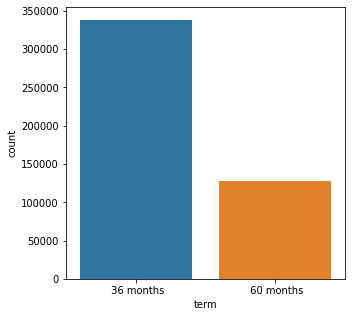

In [27]:
plt.figure(figsize=(5, 5))
sns.countplot(x=data['term'])
plt.show()

Dapat kita lihat bahwa term 36 bulan lebih diminati oleh debitur daripada term 60 bulan. Persentase term 36 bulan mencapai 72%.

### Feature grade

In [28]:
# hitung persentase feature grade
grade = data.groupby('grade').agg({'id':'count'}).reset_index()
grade.columns=['grade','total']
grade['%'] = round(grade.total*100/sum(grade.total),3)
grade

,grade,total,%
0,A,74867,16.056
1,B,136929,29.366
2,C,125293,26.870
3,D,76888,16.489
4,E,35757,7.668
5,F,13229,2.837
6,G,3322,0.712


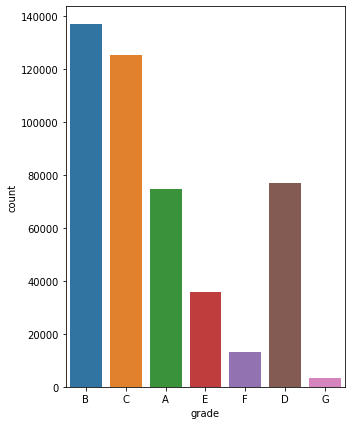

In [29]:
# plot feature grade
plt.figure(figsize=(5,7))
sns.countplot(x=data['grade'])
plt.show()

Feature `grade` didominasi oleh label B yang memiliki persentase 29%.

### Feature emp_length

In [30]:
# hitung persentase feature emp_length
emp_length = data.groupby('emp_length').agg({'id':'count'}).reset_index()
emp_length.columns = ['emp_length', 'total']
emp_length['%'] = round(emp_length.total*100/sum(emp_length.total),3)
emp_length

,emp_length,total,%
0,1 year,29622,6.652
1,10+ years,150049,33.698
2,2 years,41373,9.292
3,3 years,36596,8.219
4,4 years,28023,6.293
5,5 years,30774,6.911
6,6 years,26112,5.864
7,7 years,26180,5.879
8,8 years,22395,5.029
9,9 years,17888,4.017


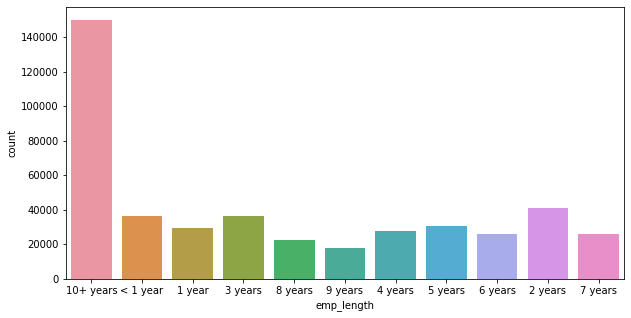

In [31]:
# plot feature emp_length
plt.figure(figsize=(10,5))
sns.countplot(x=data['emp_length'])
plt.show()

Dapat kita lihat debitur yang mengajukan pinjaman kebanyakan berstatus karyawan dengan lama bekerja lebih dari 10 tahun.

### Feature home_ownership

In [32]:
# hitung persentase feature home_ownership
home_ownership = data.groupby('home_ownership').agg({'id':'count'}).reset_index()
home_ownership.columns = ['home_ownership','total']
home_ownership['%'] = round(home_ownership.total*100/sum(home_ownership.total),3)
home_ownership=home_ownership.sort_values('%', ascending=False)
home_ownership

,home_ownership,total,%
1,MORTGAGE,235875,50.586
5,RENT,188473,40.420
4,OWN,41704,8.944
3,OTHER,182,0.039
2,NONE,50,0.011
0,ANY,1,0.000


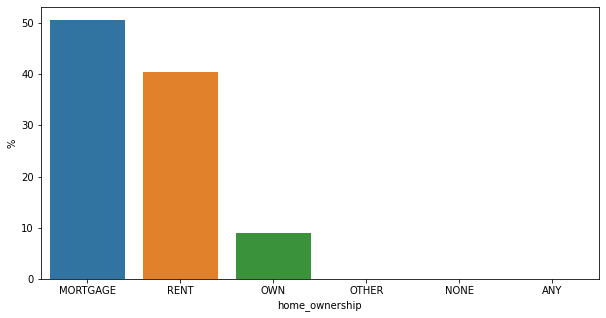

In [33]:
# plot feature home_ownership
plt.figure(figsize=(10,5))
sns.barplot(x=home_ownership['home_ownership'], y=home_ownership['%'])
plt.show()

Dapat kita lihat 50% dari total peminjam mendelegasikan benda tak bergerak sebagai jaminan pinjamannya (mortgage). Contoh dari mortgage adalah KPR, dimana peminjam bisa menempati rumahnya tetapi ia memiliki tanggungan untuk melunasisnya. Di lain sisi hanya sedikit peminjam yang memiliki rumah sendiri (own) yakni sekitar 8%. Jadi kebanyakan peminjam sebenarnya masih memiliki tanggungan pinjaman terhadap rumahnya.

### Feature pymnt_plan

In [34]:
# hitung persentase feature pymnt_plan
pymnt_plan = data.groupby('pymnt_plan').agg({'id':'count'}).reset_index()
pymnt_plan.columns = ['pymnt_plan','total']
pymnt_plan['%'] = round(pymnt_plan.total*100/sum(pymnt_plan.total),3)
pymnt_plan = pymnt_plan.sort_values('%', ascending=False)
pymnt_plan

,pymnt_plan,total,%
0,n,466276,99.998
1,y,9,0.002


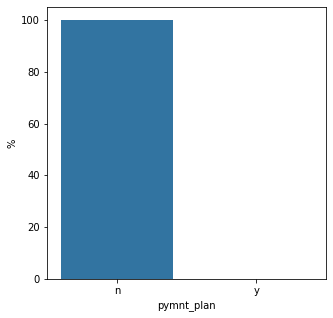

In [35]:
# plot feature pymnt_plan
plt.figure(figsize=(5,5))
sns.barplot(x=pymnt_plan['pymnt_plan'], y=pymnt_plan['%'])
plt.show()

Feature `pymnt_plan` didominasi oleh label n dengan persentase sebesar 99%, ini adalah imbalance ekstreme.

### Feature purpose

In [36]:
# hitung persentase feature purpose
purpose = data.groupby('purpose').agg({'id':'count'}).reset_index()
purpose.columns = ['purpose', 'total']
purpose['%'] = round(purpose.total*100/sum(purpose.total),3)
purpose = purpose.sort_values('%', ascending=False)
purpose

,purpose,total,%
2,debt_consolidation,274195,58.804
1,credit_card,104157,22.338
4,home_improvement,26537,5.691
9,other,23690,5.081
6,major_purchase,9828,2.108
11,small_business,7013,1.504
0,car,5397,1.157
7,medical,4602,0.987
8,moving,2994,0.642
12,vacation,2487,0.533


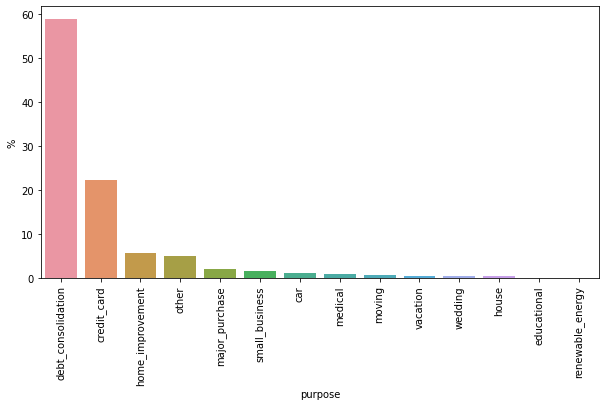

In [37]:
# plot feature purpose
plt.figure(figsize=(10,5))
sns.barplot(x=purpose['purpose'], y=purpose['%'])
plt.xticks(rotation=90)
plt.show()

Dapat kita lihat bahwa lebih dari 50% peminjam memiliki tujuan mengajukan pinjaman untuk menutup pinjaman sebelumnya. Apabila dilihat dari jenisnya, tujuan untuk konsumsi lebih banyak daripada tujuan untuk bisnis, renovasi, ataupun pendidikan.

### Feature initial_list_status

In [38]:
# hitung persentase feature initial_list_status
initial_list_status = data.groupby('initial_list_status').agg({'id':'count'}).reset_index()
initial_list_status.columns = ['initial_list_status','total']
initial_list_status['%'] = round(initial_list_status.total*100/sum(initial_list_status.total),3)
initial_list_status = initial_list_status.sort_values('%', ascending=False)
initial_list_status

,initial_list_status,total,%
0,f,303005,64.983
1,w,163280,35.017


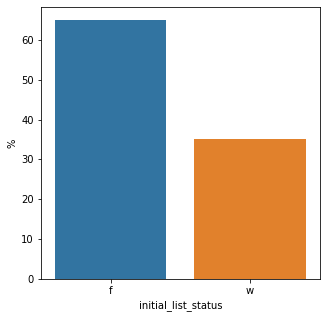

In [39]:
# plot feature initial_list_status
plt.figure(figsize=(5,5))
sns.barplot(x=initial_list_status['initial_list_status'], y=initial_list_status['%'])
plt.show()

Feature `initial_list_status` didominasi oleh lable f sebesar 60% lebih.

## Univariate Analysis : Numerical Features

In [40]:
# print feature bertipe numeric
print(numerics)
print('-------')
print(len(numerics))

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
-------
35


In [41]:
# feature id dan police_code tidak diikutsertakan, serta loan_status yang menjadi target variable
# masukkan feature numerical ke dalam variable temp
temp = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
        'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
        'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
        'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
        'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

### Distribution Numerical Features

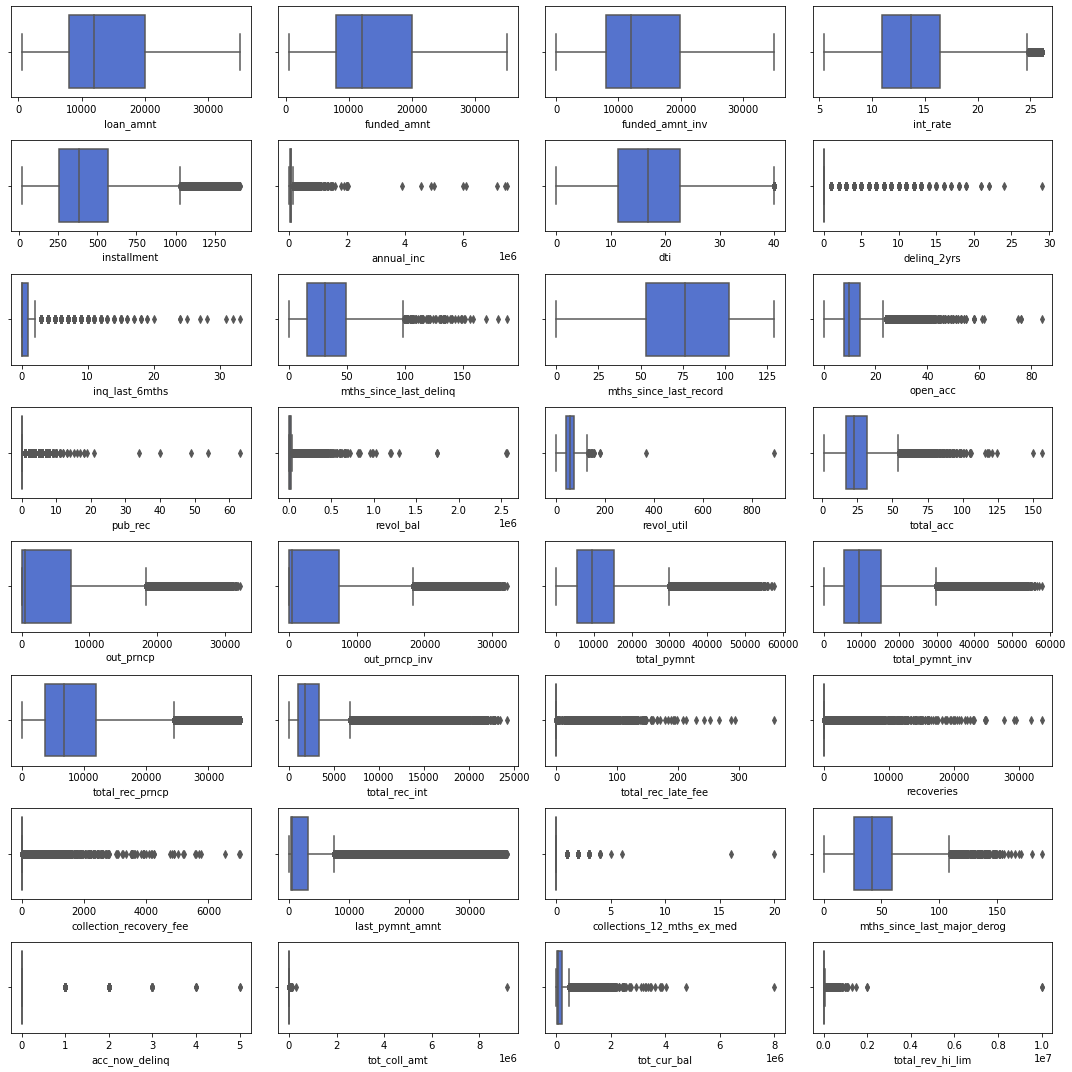

In [42]:
# plot distribusi data feature numerical
plt.figure(figsize=(15,15))
for i in range(0, len(temp)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=data[temp[i]], color='royalblue')
    plt.xlabel(temp[i])
    plt.tight_layout()

**Observasi:**

Feature yang tidak memiliki outliers adalah `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `dti`, `mths_since_last_record`
Feature `acc_now_delinq` merupakan data ordinal.

## Bivariate Analysis : Categorical Features

Di tahap ini kita akan menganalisis hubungan yang terjadi antara fitur bertipe categorical dengan target variable yakni `loan_status`.

In [43]:
# print data categorical
print(categorics)
print("---------")
print(len(categorics))

['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'application_type']
---------
9


In [44]:
# simpan feature categorics di temp
temp = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']

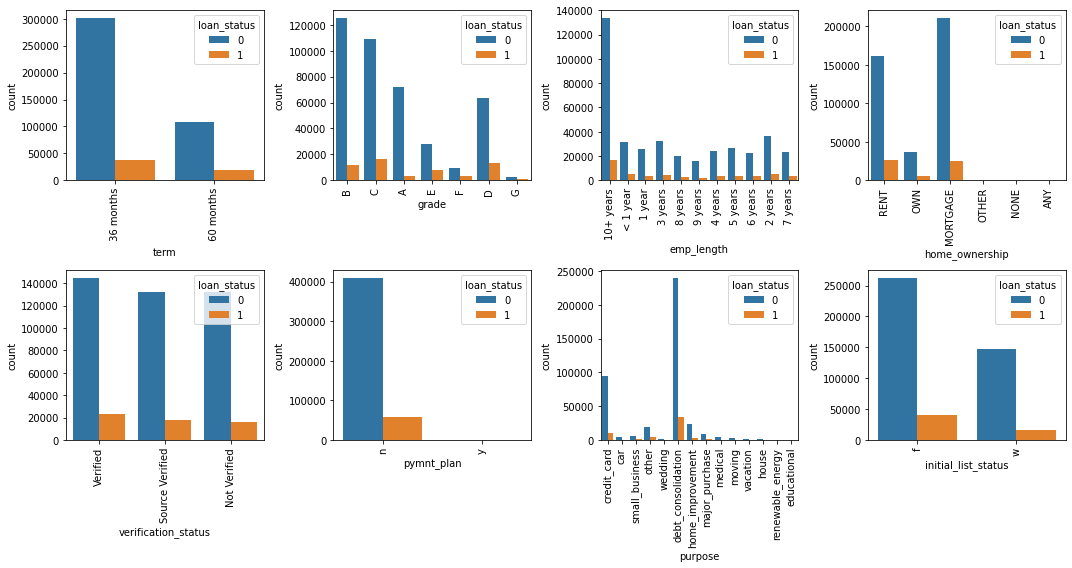

In [45]:
# plot semua data feature categorics
plt.figure(figsize=(15,8))

for i in range(0, len(temp)):
  plt.subplot(2, 4, i+1)
  sns.countplot(x=data[temp[i]], hue=data["loan_status"])
  plt.xlabel(temp[i])
  plt.xticks(rotation=90)
  plt.tight_layout()

## Bivariate Analysis : Numerical Features

Pada tahap ini kita akan coba menganalisis hubungan feature numerik dengan target variable kita yakni loan_status.

In [46]:
print(numerics)
print('------')
print('Jumlah numeric: ', len(numerics))

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
------
Jumlah numeric:  35


In [47]:
# kita tidak memasukkan id, loan_status, dan policy_code
temp = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
print(temp)
print("------")
print(len(temp))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
------
32


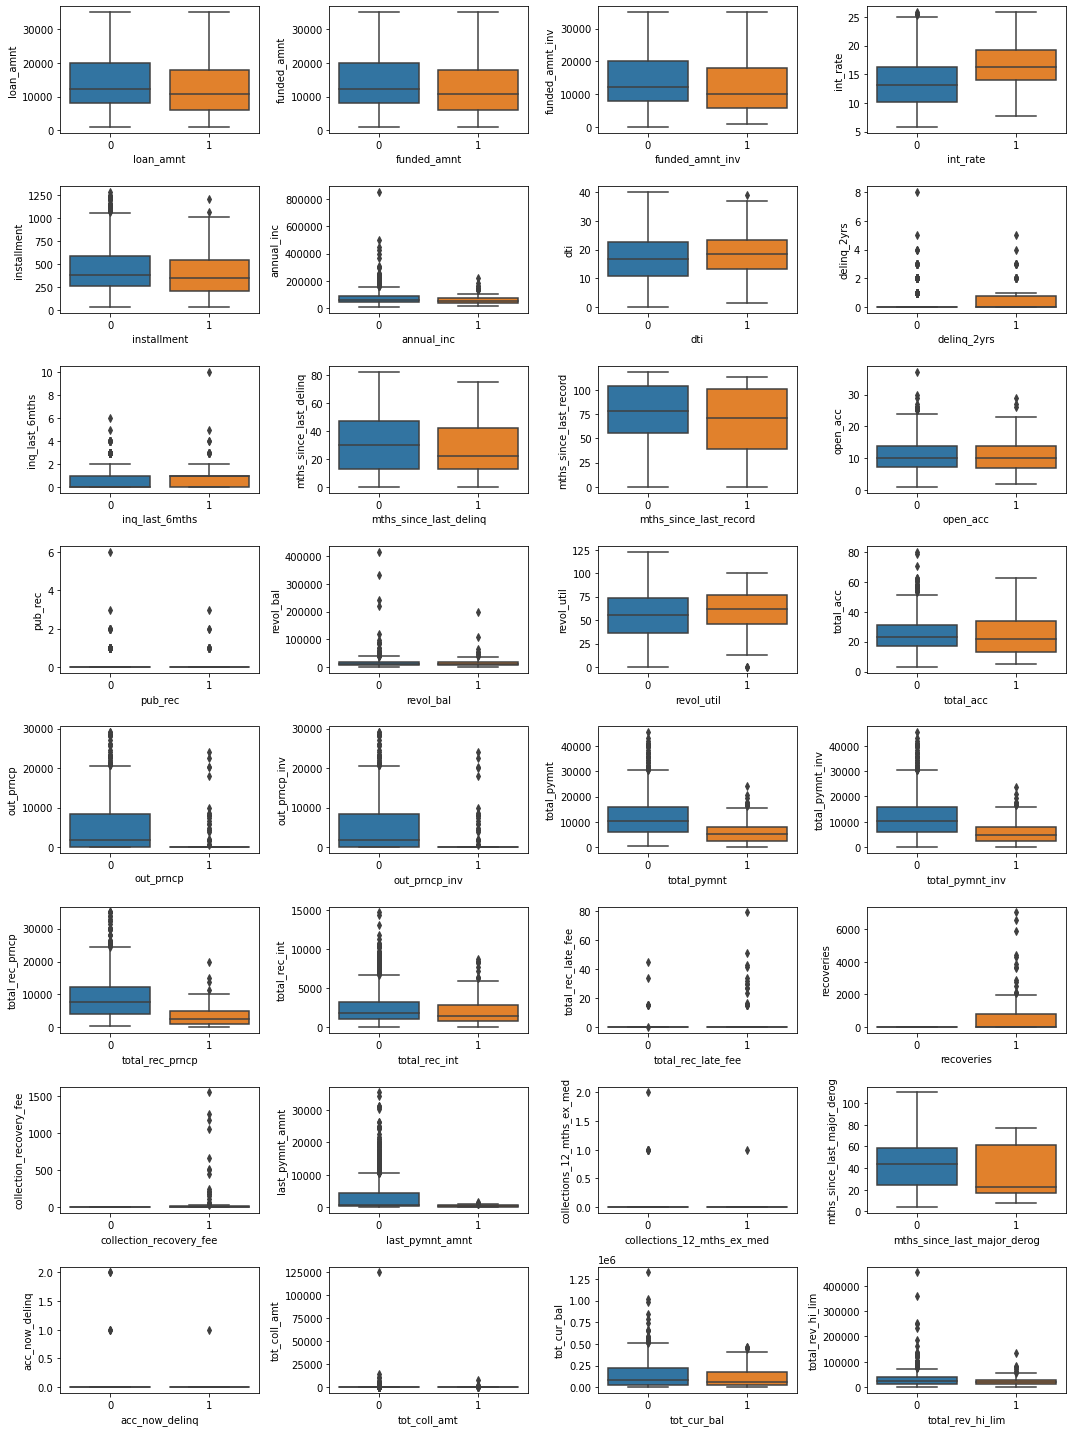

In [48]:
# plot semua data
df_sample=data.sample(1000, random_state=1)
plt.figure(figsize=(15, 20))
for i in range(0, len(temp)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(y=df_sample[temp[i]], x=data['loan_status'])
    plt.xlabel(temp[i])
    plt.tight_layout()

**Observasi:**

* Peminjam dengan nilai `total_rec_prncp` diantara 0 hingga 5000 adalah peminjam yang gagal bayar. Sedangkan peminjam dengan nilai total_rec_prncp lebih dari 5000 adalah peminjam yang mampu bayar.
* Pada feature `total_rec_int` peminjam yang mampu dan gagal bayar ada pada rentang yang sama, yaitu antara 0 hingga 5000.
* Peminjam yang gagal bayar memiliki nilai `total_rec_late_fee` yang lebih tinggi dibandingkan peminjam yang mampu bayar
* Peminjam dengan nilai `recoveries` lebih besar dari 0 merupakan peminjam yang gagal bayar. Sedangkan peminjam dengan `recoveries` sama dengan 0 merupakan peminjam yang mampu bayar.
* Peminjam dengan `collection_recovery_fee` lebih besar dari 0 adalah peminjam yang gagal bayar. Sedangkan, peminjam dengan `collection_recovery_fee` sama dengan 0 adalah peminjam yang dapat membayar.
* Pada feature `last_pymnt_amnt` peminjam yang total pembayaran terakhir (last_pymnt_amnt) kurang dari 10000 adalah peminjam yang gagal bayar.
* Peminjam dengan nilai `mnth_since_Last_major_derog` diantara 0 hingga 75 adalah peminjam yang gagal bayar.
* Peminjam dengan nilai `tot_cur_bal` diantara 0 hingga 0.5 adalah peminjam yang gagal bayar.
* Peminjam dengan nilai `total_rev_hi_lim` diantara 0 hingga 150000 adalah peminjam yang gagal bayar.

### total_pymnt

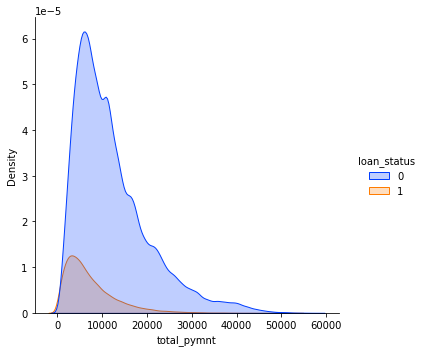

In [49]:
# loan status berdasarkan total payment (total uang yang telah dibayarkan)
sns.displot(data, x="total_pymnt", hue="loan_status", kind="kde", fill=True, palette="bright")

### loan_amnt

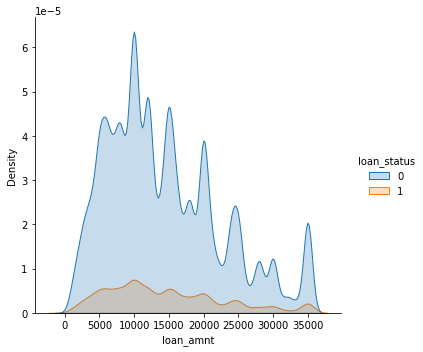

In [50]:
# loan status berdasarkan jumlah pinjaman
sns.displot(data, x="loan_amnt", hue="loan_status", kind="kde", fill=True)

### recoveries


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


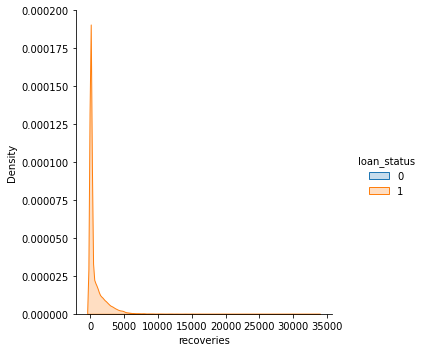

In [51]:
# loan status berdasarkan recoveries
# bad status memiliki recoveries yang sangat tinggi
sns.displot(data, x="recoveries", hue="loan_status", kind="kde", fill=True)

## Insight

### **total_rec_prncp**

Feature `total_rec_prncp` adalah pinjaman pokok yang telah diterima perusahaan hingga saat ini. Dengan kata lain ini adalah jumlah pinjaman pokok yang dipinjamkan kepada debitur.

Kita akan melihat rata-rata total pinjaman pokok berdasarkan tujuan pinjaman (purpose) dan status pinjamannya (loan_status).

In [52]:
ma1 = data.groupby(['loan_status','purpose']).agg({'total_rec_prncp':'mean'}).reset_index().sort_values(['total_rec_prncp'],ascending=False)
ma1.columns = ['loan_status','purpose','avg_total_rec_prncp']
ma1

,loan_status,purpose,avg_total_rec_prncp
5,0,house,12123.605934
11,0,small_business,11429.457327
2,0,debt_consolidation,9949.665953
13,0,wedding,9722.364071
1,0,credit_card,9643.124481
4,0,home_improvement,9408.267274
10,0,renewable_energy,7973.117603
6,0,major_purchase,7476.015380
9,0,other,6671.477776
3,0,educational,6522.118699


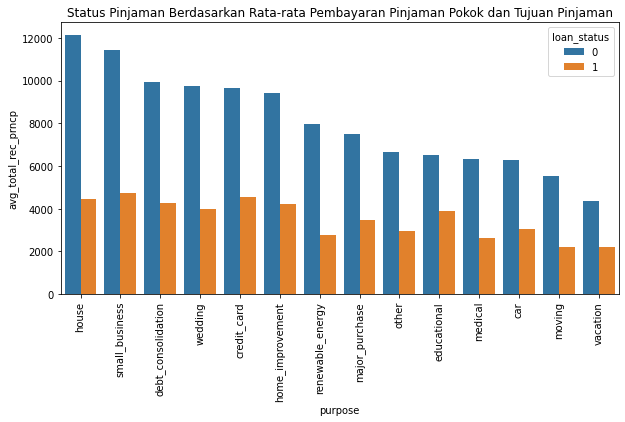

In [53]:
plt.figure(figsize=(10,5))
plt.title("Status Pinjaman Berdasarkan Rata-rata Pembayaran Pinjaman Pokok dan Tujuan Pinjaman")
sns.barplot(data=ma1, y='avg_total_rec_prncp', x='purpose', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

Rata-rata peminjam mampu memenuhi pembayaran pinjaman pokok. Dan tujuan pinjaman untuk `house` memiliki tingkat keberhasilan pembayaran pinjaman pokok paling tinggi.

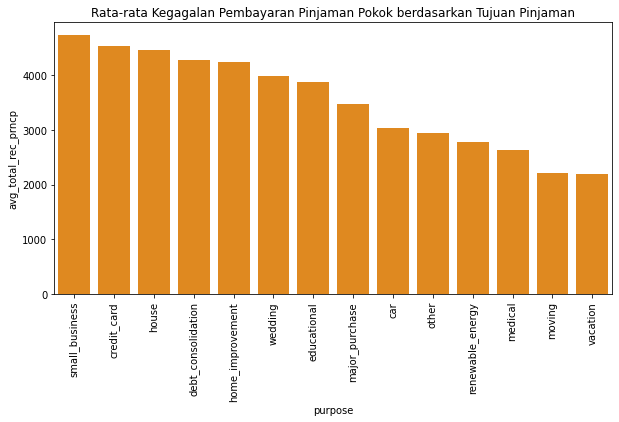

In [54]:
# plot pembayaran rata-rata pinjaman pokok yang gagal dibayar berdasarkan tujuan pinjamannya
plt.figure(figsize=(10,5))
plt.title("Rata-rata Kegagalan Pembayaran Pinjaman Pokok berdasarkan Tujuan Pinjaman")
sns.barplot(x='purpose',y=ma1['avg_total_rec_prncp'].sort_values(ascending=False),data=ma1[ma1['loan_status']==1],color='darkorange')
plt.xticks(rotation=90)
plt.show()

Dari grafik dapat dilihat bahwa pinjaman dengan tujuan untuk usaha kecil memiliki kegagalan pembayaran pinjaman pokok paling tinggi.

### **total_rec_prncp dan grade**

In [55]:
ma2 = data.groupby(['loan_status','grade']).agg({'total_rec_prncp':'mean'}).reset_index().sort_values(['total_rec_prncp'],ascending=False)
ma2.columns = ['loan_status','grade','avg_total_rec_prncp']
ma2

,loan_status,grade,avg_total_rec_prncp
6,0,G,12218.376431
5,0,F,10881.921911
0,0,A,10022.517646
4,0,E,9963.659413
1,0,B,9627.814224
2,0,C,9102.659257
3,0,D,9002.060251
7,1,A,4950.103527
8,1,B,4765.873521
9,1,C,4160.378823


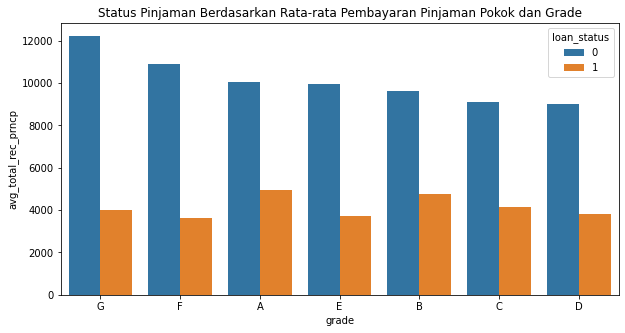

In [56]:
# plot 
plt.figure(figsize=(10,5))
plt.title("Status Pinjaman Berdasarkan Rata-rata Pembayaran Pinjaman Pokok dan Grade")
sns.barplot(data=ma2, y='avg_total_rec_prncp', x='grade', hue='loan_status')
plt.show()

Tingkat pinjaman atau grade G menempati posisi teratas terhadap kemampuan membayar total pinjaman pokoknya.

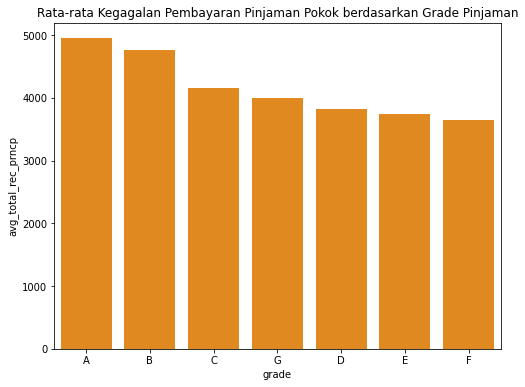

In [57]:
# plot pembayaran rata-rata pinjaman pokok yang gagal dibayar berdasarkan grade pinjaman
plt.figure(figsize=(8,6))
plt.title("Rata-rata Kegagalan Pembayaran Pinjaman Pokok berdasarkan Grade Pinjaman")
sns.barplot(x='grade', y='avg_total_rec_prncp', data=ma2[ma2['loan_status']==1],color='darkorange')
plt.show()

Bisa dilihat bahwa tingkat pinjaman grade A memiliki kegagalan pembayaran paling tinggi terhadap total pinjaman pokok.

In [58]:
# kegagalan pembayaran pinjaman pokok berdasarkan purpose pinjaman dan grade pinjaman
ma3 = data.groupby(['loan_status','grade','purpose']).agg({'total_rec_prncp':'mean'}).reset_index()
ma3.columns = ['loan_status','grade','purpose','avg_total_rec_prncp']
ma3[ma3['loan_status']==1].sort_values(['avg_total_rec_prncp'],ascending=False)

,loan_status,grade,purpose,avg_total_rec_prncp
183,1,G,credit_card,6508.968000
123,1,B,small_business,5546.169960
99,1,A,credit_card,5456.450024
103,1,A,house,5416.196316
102,1,A,home_improvement,5411.697653
117,1,B,house,5250.422632
100,1,A,debt_consolidation,5243.895256
151,1,D,small_business,5203.665934
131,1,C,house,5196.790824
171,1,F,educational,5128.552500


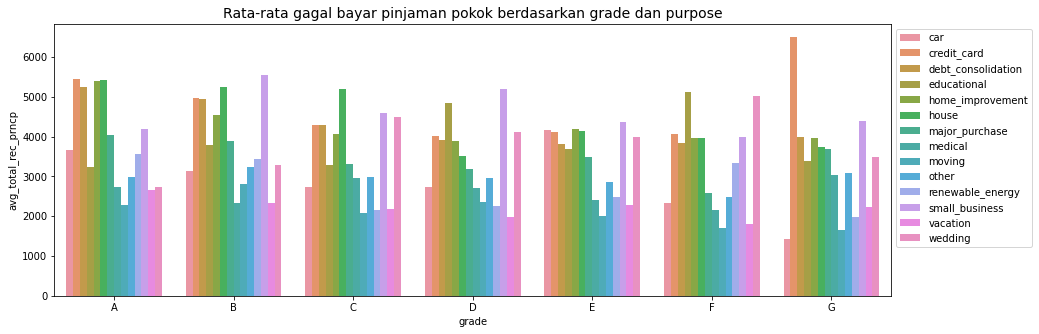

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(x='grade',y='avg_total_rec_prncp',hue='purpose',data=ma3[ma3['loan_status']==1])
plt.title('Rata-rata gagal bayar pinjaman pokok berdasarkan grade dan purpose',fontsize=14)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Jika peminjam yang gagal bayar ditinjau dari grade, purpose, dan rata-rata total_rec_prncp maka peminjam yang ada pada kategori grade G dengan tujuan pinjaman `credit_card`. Sedangkan pada grade A banyak dijumpai potensi gagal bayar untuk tujuan pinjaman `credit_card`, `house`, `home_improvement`, dan `debt_consolidation`. Sehingga dapat disimpulkan bahwa, untuk mengurangi peminjam yang gagal bayar dapat mempertimbangkan untuk menolak peminjam dengan tujuan credit_card pada grade G dan beberapa tujuan pinjaman pada grade A.

### **collection_recovery_fee**

In [60]:
ma4 = data.groupby(['loan_status','purpose']).agg({'collection_recovery_fee':'mean'}).reset_index().sort_values(['collection_recovery_fee'],ascending=False)
ma4.columns = ['loan_status','purpose','avg_collection_recovery_fee']
ma4

,loan_status,purpose,avg_collection_recovery_fee
24,1,renewable_energy,133.653159
25,1,small_business,98.985753
27,1,wedding,93.914694
16,1,debt_consolidation,76.994056
18,1,home_improvement,76.885438
17,1,educational,76.007167
15,1,credit_card,69.032896
19,1,house,65.675809
20,1,major_purchase,56.796752
21,1,medical,53.579933


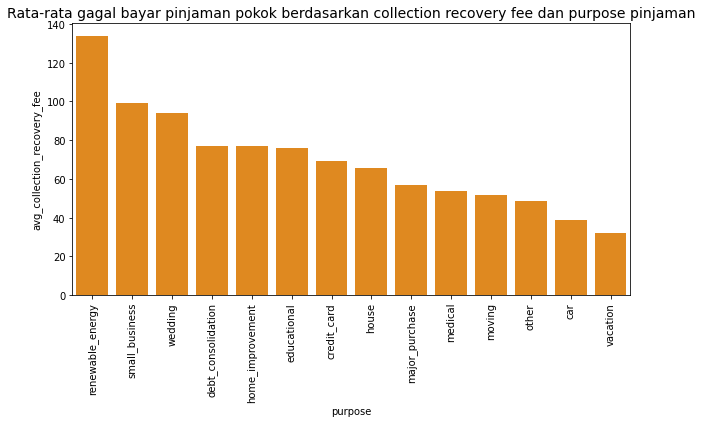

In [61]:
plt.figure(figsize=(10, 5))
plt.title('Rata-rata gagal bayar pinjaman pokok berdasarkan collection recovery fee dan purpose pinjaman',fontsize=14)
sns.barplot(x='purpose',y=ma4['avg_collection_recovery_fee'].sort_values(ascending=False), data=ma4[ma4['loan_status']==1], color='darkorange')
plt.xticks(rotation=90)
plt.show()

In [62]:
ma5 = data.groupby(['loan_status','grade']).agg({'collection_recovery_fee':'mean'}).reset_index().sort_values(['collection_recovery_fee'],ascending=False)
ma5.columns = ['loan_status','grade','avg_collection_recovery_fee']
ma5

,loan_status,grade,avg_collection_recovery_fee
13,1,G,139.903645
12,1,F,126.241078
11,1,E,98.051281
10,1,D,75.316240
9,1,C,63.835971
8,1,B,50.931447
7,1,A,44.804159
0,0,A,0.000000
1,0,B,0.000000
2,0,C,0.000000


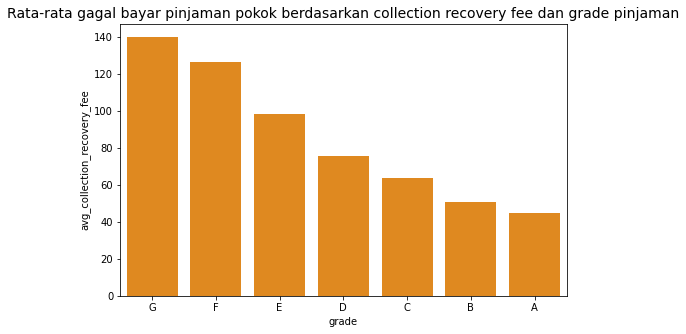

In [63]:
plt.figure(figsize=(8,5))
plt.title('Rata-rata gagal bayar pinjaman pokok berdasarkan collection recovery fee dan grade pinjaman',fontsize=14)
sns.barplot(x='grade',y='avg_collection_recovery_fee', data=ma5[ma5["loan_status"]==1], color="darkorange")
plt.show()

In [64]:
ma6 = data.groupby(['loan_status','grade','purpose']).agg({'collection_recovery_fee':'mean'}).reset_index()
ma6.columns = ['loan_status','grade','purpose','avg_collection_recovery_fee']
ma6[ma6['loan_status']==1]

,loan_status,grade,purpose,avg_collection_recovery_fee
98,1,A,car,31.281813
99,1,A,credit_card,54.874075
100,1,A,debt_consolidation,45.971598
101,1,A,educational,57.945450
102,1,A,home_improvement,31.784550
103,1,A,house,31.029611
104,1,A,major_purchase,35.691744
105,1,A,medical,11.950642
106,1,A,moving,4.787135
107,1,A,other,18.144320


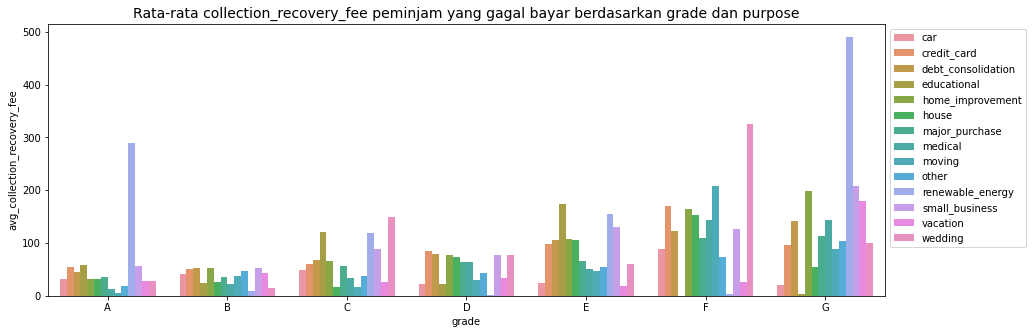

In [65]:
plt.figure(figsize=(15,5))
plt.title('Rata-rata collection_recovery_fee peminjam yang gagal bayar berdasarkan grade dan purpose',fontsize=14)
sns.barplot(x='grade',y='avg_collection_recovery_fee',hue='purpose',data=ma6[ma6['loan_status']==1])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Jika peminjam yang gagal bayar ditinjau dari feature `grade`, `purpose`, dan rata-rata `collection_recovery_fee`, maka peminjam yang berisiko untuk gagal bayar tertinggi ada pada kategori `grade` G dengan tujuan peminjaman untuk energi terbarukan. Di posisi ke dua tertinggi, risiko peminjam yang gagal bayar ada pada kategori `grade` F dengan tujuan peminjaman untuk pernikahan. Di posisi ketiga tertinggi, risiko peminjam yang akakn gagal bayar ada pada kategori `grade` G dengan tujuan peminjaman untuk perbaikan rumah.  Sehingga dapat dibertimbangkan untuk peminjam yang ada pada kategori tersebut untuk ditolak peminjaman kreditnya.

### **recoveries**

Recoveries hanyak dimiliki oleh peminjam yang gagal bayar.

In [66]:
ma7 = data.groupby(['loan_status','purpose']).agg({'recoveries':'mean'}).reset_index().sort_values(['recoveries'],ascending=False)
ma7.columns = ['loan_status','purpose','avg_recoveries']
ma7[ma7['loan_status']==1]

,loan_status,purpose,avg_recoveries
24,1,renewable_energy,935.245763
25,1,small_business,928.872151
19,1,house,854.786273
27,1,wedding,756.989396
16,1,debt_consolidation,734.992137
18,1,home_improvement,733.148324
15,1,credit_card,643.429420
20,1,major_purchase,574.391224
23,1,other,500.451997
21,1,medical,469.483656


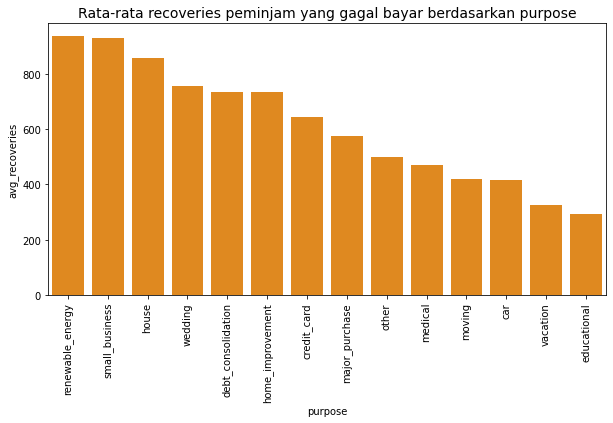

In [67]:
plt.figure(figsize=(10,5))
plt.title('Rata-rata recoveries peminjam yang gagal bayar berdasarkan purpose',fontsize=14)
sns.barplot(x='purpose', y=ma7['avg_recoveries'].sort_values(ascending=False), data=ma7[ma7['loan_status']==1], color='darkorange')
plt.xticks(rotation=90)
plt.show()

Jika ditinjau berdasarkan rata-rata `recoveries` dan tujuan peminjaman `purpose`, peminjam yang ada pada kategori renewable_energy memiliki rata-rata recoveries tertinggi yang berarti peminjam pada kategori ini cenderung akan gagal bayar (bad debt). Sehingga untuk mengurangi peminjam yang gagal bayar, dapat ditinjau kembali atau ditolak jika user melakukan pinjaman untuk tujuan renewable_energy karena risiko kredit akan gagal bayar.

In [68]:
ma8 = data.groupby(['loan_status','grade']).agg({'recoveries':'mean'}).reset_index().sort_values(['recoveries'],ascending=False)
ma8.columns = ['loan_status','grade','avg_recoveries']
ma8[ma8['loan_status']==1]

,loan_status,grade,avg_recoveries
12,1,F,1235.844566
13,1,G,1204.011822
11,1,E,950.259029
10,1,D,702.029513
9,1,C,595.379830
8,1,B,510.601564
7,1,A,423.804888


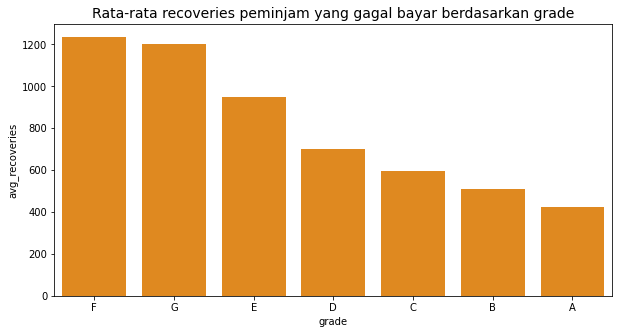

In [69]:
plt.figure(figsize=(10,5))
plt.title('Rata-rata recoveries peminjam yang gagal bayar berdasarkan grade',fontsize=14)
sns.barplot(x='grade',y='avg_recoveries',data=ma8[ma8['loan_status']==1],color='darkorange')
plt.show()

In [70]:
ma9 = data.groupby(['loan_status','grade','purpose']).agg({'recoveries':'mean','annual_inc':'mean','dti':'mean'}).reset_index()
ma9.columns = ['loan_status','grade','purpose','avg_recoveries','avg_annual_inc','avg_dti']
ma9[ma9['loan_status']==1]

,loan_status,grade,purpose,avg_recoveries,avg_annual_inc,avg_dti
98,1,A,car,267.553249,54910.774359,12.735000
99,1,A,credit_card,458.852361,72646.549348,16.842384
100,1,A,debt_consolidation,438.429249,69486.116680,16.818382
101,1,A,educational,337.006667,51839.250000,8.726667
102,1,A,home_improvement,391.617449,80438.887347,13.588214
103,1,A,house,400.423158,76515.789474,14.287895
104,1,A,major_purchase,311.863838,64065.028283,13.017576
105,1,A,medical,163.609722,68095.444444,12.668333
106,1,A,moving,168.526452,43911.451613,12.121935
107,1,A,other,263.197990,57193.288205,13.900653


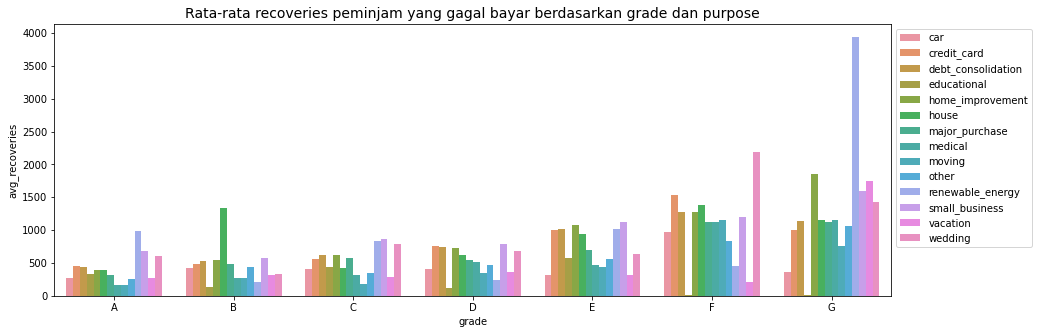

In [71]:
plt.figure(figsize=(15,5))
plt.title('Rata-rata recoveries peminjam yang gagal bayar berdasarkan grade dan purpose',fontsize=14)
sns.barplot(x='grade',y='avg_recoveries',hue='purpose',data=ma9[ma9['loan_status']==1])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Jika peminjam yang gagal bayar ditinjau dari feature grade, purpose, dan rata-rata nilai recoveries, maka peminjam yang berada pada kategori grade `G` dengan tujuan untuk `energi terbarukan` perlu dipertimbangkan untuk ditolak pengajuan kreditnya karena memiliki risiko kredit gagal bayar. Begitu pula dengan peminjam yang berada pada kategori grade `F` dengan tujuan peminjaman `wedding` juga perlu dipertimbangkan untuk ditolak pengajuan kreditnya karena mimiliki risiko gagal bayar. Begitu pula pada grade `B` dengan tujuan peminjaman `house` memiliki resiko kredit gagal bayar sehingga dapat dipertimbangkan untuk menolak pengajuan kreditnya.

### **income tahunan debitur**

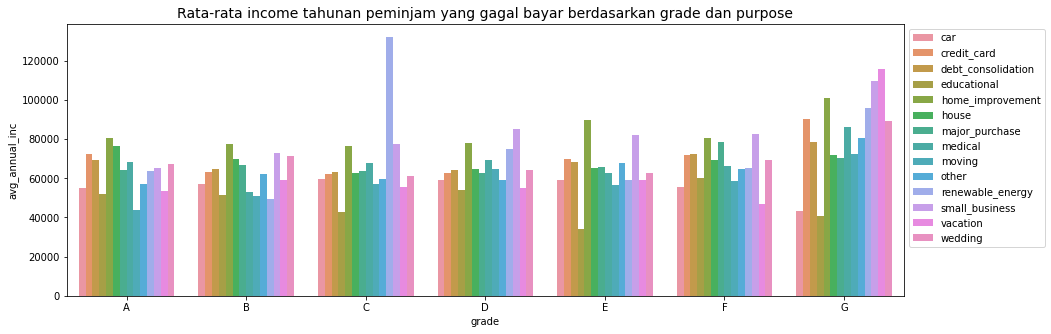

In [72]:
plt.figure(figsize=(15,5))
sns.barplot(x='grade',y='avg_annual_inc',hue='purpose',data=ma9[ma9['loan_status']==1])
plt.title('Rata-rata income tahunan peminjam yang gagal bayar berdasarkan grade dan purpose',fontsize=14)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [73]:
z = data[data['loan_status']==1][['grade','purpose','dti','recoveries','annual_inc']]
zg = z.groupby(['grade','purpose']).agg({'dti':'mean','recoveries':'mean'}).reset_index().sort_values(['grade','recoveries'],ascending=[True,False])
zg[zg['grade']=='G']

,grade,purpose,dti,recoveries
94,G,renewable_energy,17.611667,3941.606667
88,G,home_improvement,15.917627,1861.154915
96,G,vacation,16.530000,1743.746667
95,G,small_business,13.636893,1600.274175
97,G,wedding,19.700000,1424.001111
89,G,house,16.542609,1153.989565
91,G,medical,16.682778,1147.803333
86,G,debt_consolidation,20.319313,1143.898802
90,G,major_purchase,16.735333,1116.239333
93,G,other,17.541761,1062.213028


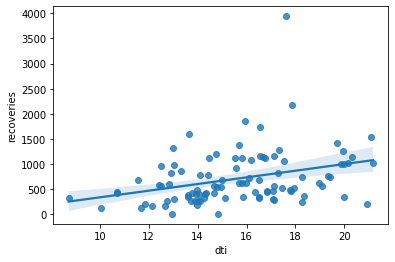

In [74]:
sns.regplot(x='dti',y='recoveries',data=zg)

## Modified Data & Feature Engineering

Pada tahap ini kita akan melakukan modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling. Misalnya seperti format datetime. Karena pemrosesan modeling dilakukan oleh komputer, sedangkan komputer hanya bisa mengenali dalam format numerik.

### emp_length

Modifikasi emp_length, dimana data sebelumnya adalah `4 years` lalu kita modifikasi menjadi `4`. 

In [75]:
# cek data emp_length unique
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [76]:
# modifikasi dan buat kolom baru bernama emp_length_int
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [77]:
# ubah tipe data emp_length_int menjadi float
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [78]:
data['emp_length_int'].sample(10)

127814     0.0
105243     4.0
414068    10.0
235056    10.0
98178      6.0
360598     3.0
247706    10.0
203269     9.0
398663    10.0
113150    10.0
Name: emp_length_int, dtype: float64

In [79]:
# drop emp_length
data.drop('emp_length', axis=1, inplace=True)

### term

Memodifikasi `term`. Contoh: 36 months -> 36

In [80]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [81]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [82]:
data.drop('term', axis=1, inplace=True)

### earliest_cr_line

Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. Dalam contoh ini, saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [83]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [84]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [85]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [86]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat ada nilai yang aneh, yaitu negatif.

In [87]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [88]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [89]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`.

In [90]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [91]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [92]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`.

In [93]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [94]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [95]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### next_pymnt_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`.

In [96]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [97]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [98]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`.

In [99]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [100]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [101]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

## Correlation Check

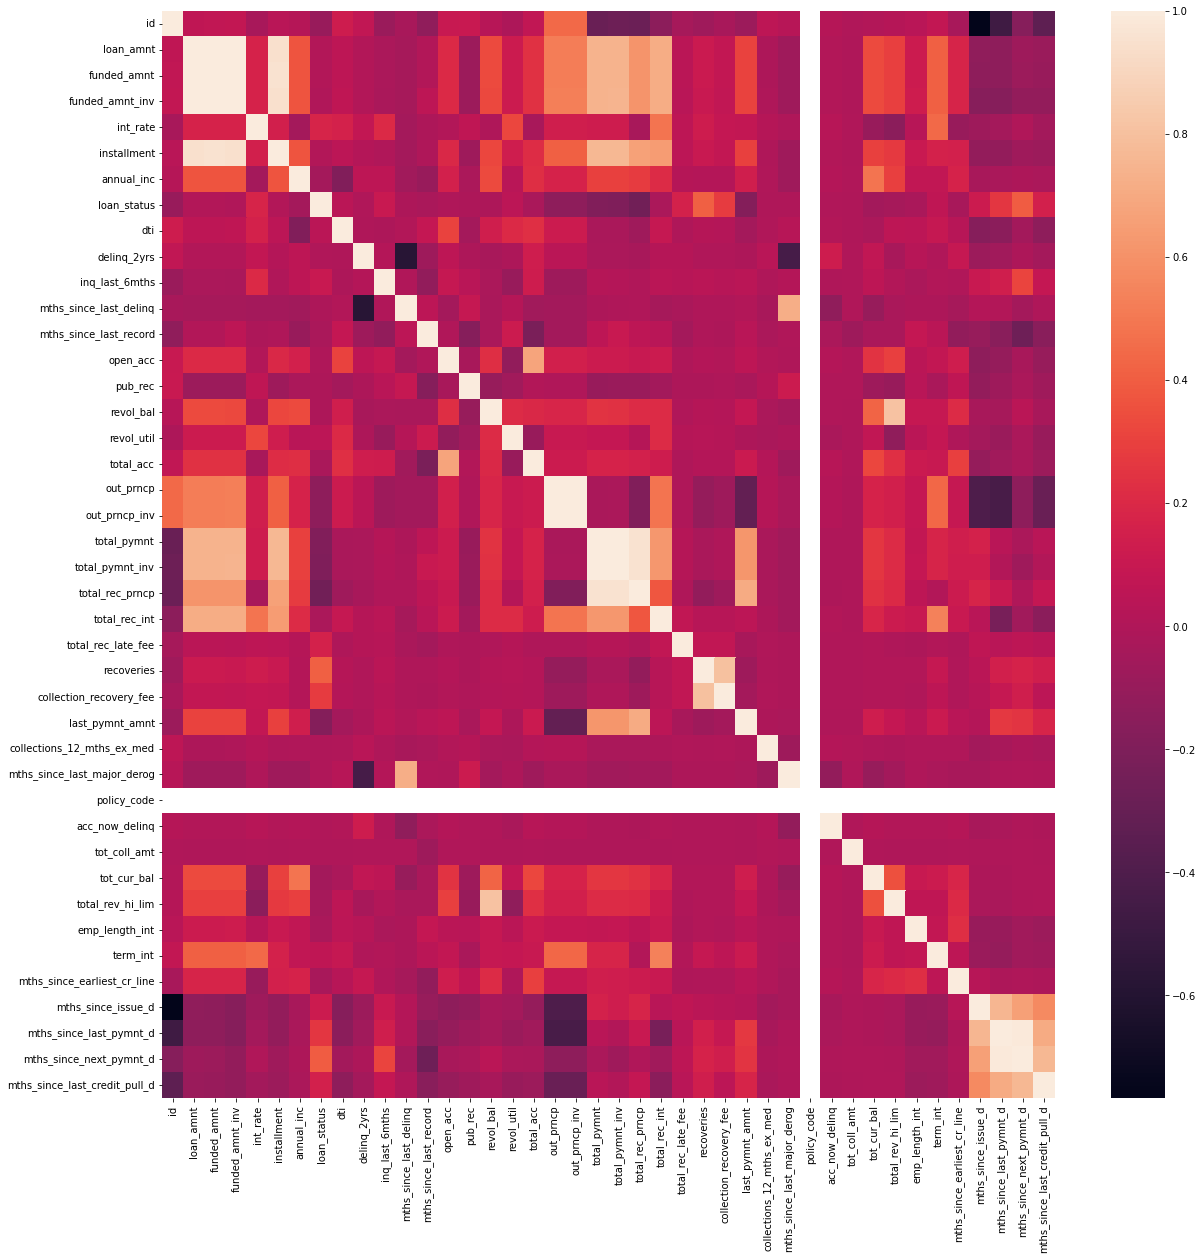

In [102]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [103]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [104]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_issue_d',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [105]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   int_rate                     466285 non-null  float64
 3   grade                        466285 non-null  object 
 4   emp_title                    438697 non-null  object 
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466281 non-null  float64
 7   verification_status          466285 non-null  object 
 8   loan_status                  466285 non-null  int64  
 9   pymnt_plan                   466285 non-null  object 
 10  purpose                      466285 non-null  object 
 11  title                        466265 non-null  object 
 12  addr_state                   466285 non-null  object 
 13 

## Check Categorical Features

In [107]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [108]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [109]:
data.select_dtypes(exclude='object').nunique()

id                             466285
loan_amnt                        1352
int_rate                          506
annual_inc                      31901
loan_status                         2
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
dtype: int64

Ternyata, pada tipe data selain `object` juga terdapat fitur yang hanya memiliki satu nilai saja dan fitur yang terlalu unik, yakni `policy_code` dan `id` maka akan ikut dibuang juga.

In [110]:
data.drop(['id', 'policy_code'], axis=1, inplace=True)

In [111]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [112]:
data.drop('pymnt_plan', axis=1, inplace=True)

# Data Preprocessing

## Missing Value Checking

Kita akan melakuka pengecekan feature yang memiliki missing value.

In [114]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

Kita memutuskan bahwa untuk kolom yang memiliki missing value diatas 75% akan kita buang. Pada hasil diatas dapat diatas bahwa kolom `mths_since_last_record` memiliki missing value sebear 86%

In [115]:
data.drop('mths_since_last_record', axis=1, inplace=True)

## Missing Values Imputation

Kita isi missing value pada tiap kolom. Bisa kita isi missing value dengan nilai mean ataupun 0.

In [116]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

## Feature Scalling and Transformation

### One Hot Encoding

Semua kolom kategorikal dilakukan One Hot Encoding.

In [117]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [118]:
categorical_cols

['grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'initial_list_status']

In [119]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [120]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [121]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['loan_status']]

In [122]:
numerical_cols

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_rec_late_fee',
 'recoveries',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'emp_length_int',
 'term_int',
 'mths_since_earliest_cr_line']

In [123]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [124]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553


### Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi.

In [126]:
data_model = pd.concat([onehot, std, data[['loan_status']]], axis=1)

# Modeling

## Train Test Split

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X = data_model.drop('loan_status', axis=1)
y = data_model['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 98), (93257, 98), (373028,), (93257,))

## Random Forest

### Training

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Feature Importance dapat ditampilkan.

In [133]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
90,recoveries,4.953099e-01
88,out_prncp,1.354374e-01
89,total_rec_late_fee,1.159826e-01
77,int_rate,7.306970e-02
81,inq_last_6mths,4.463023e-02
94,tot_cur_bal,1.971008e-02
3,grade_E,1.495801e-02
4,grade_F,1.278334e-02
2,grade_D,1.158955e-02
96,term_int,1.043890e-02


### Validation

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [134]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

### AUC

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score

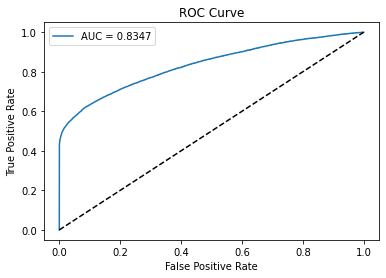

In [136]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

### KS

In [137]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [138]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,352638,0,0.064230,1,0,1,0.000011,0.0,0.000012
1,318621,0,0.064319,2,0,2,0.000021,0.0,0.000024
2,452527,0,0.064394,3,0,3,0.000032,0.0,0.000037
3,409192,0,0.064558,4,0,4,0.000043,0.0,0.000049
4,321938,0,0.064566,5,0,5,0.000054,0.0,0.000061


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5350')

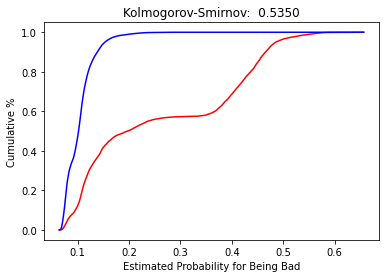

In [140]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.857` dan `KS = 0.56`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

## Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
logres = LogisticRegression(max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1)
logres

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

### Training

In [143]:
logres.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

In [144]:
test_label_counts = y_test.value_counts()
test_label_counts

0    81800
1    11457
Name: loan_status, dtype: int64

In [145]:
test_label_counts.max() / test_label_counts.sum()

0.8771459515103424

### Metrik Klasifikasi

#### Train

In [146]:
logres.score(X_train, y_train)

0.8431377805419432

In [148]:
from sklearn.metrics import classification_report, confusion_matrix

In [149]:
report = classification_report(y_true=y_train, y_pred=logres.predict(X_train))
print(report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.91    327165
           1       0.41      0.63      0.50     45863

    accuracy                           0.84    373028
   macro avg       0.68      0.75      0.70    373028
weighted avg       0.88      0.84      0.86    373028



#### Test

In [150]:
logres.score(X_test, y_test)

0.8437650792969965

In [151]:
report = classification_report(y_true=y_test, y_pred=logres.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.91     81800
           1       0.41      0.64      0.50     11457

    accuracy                           0.84     93257
   macro avg       0.68      0.75      0.70     93257
weighted avg       0.88      0.84      0.86     93257



### Confusion Matrix

In [152]:
conf = confusion_matrix(y_true=y_test, y_pred=logres.predict(X_test))

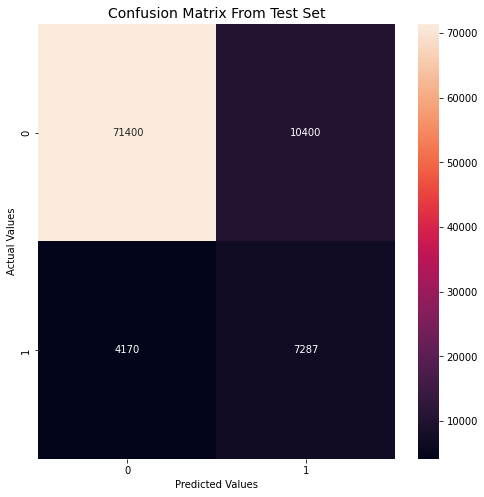

In [153]:
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix From Test Set', fontsize=14)
ax = sns.heatmap(conf, annot=True, fmt="g")
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

# Saran

Beberapa hal lain yang dapat dilakukan untuk project ini:

- Jika menginginkan interpretabilitas yang lebih tinggi, dapat mempertimbangkan untuk membuat Credit Scorecard dengan menggunakan algoritma Logistic Regression dengan pendekatan-pendekatannya seperti Feature Selection menggunakan Information Value dan Feature Engineering menggunakan Weight of Evidence.

- Jika interpretabilitas tidak terlalu dibutuhkan, dapat mempertimbangkan untuk mencoba algoritma-algoritma Machine Learning lainnya seperti Boosting.

- Melakukan hyperparameter tuning.

- Melakukan pemeriksaan atau memastikan bahwa model yang telah dibuat tidak overfitting. Hal ini dapat dilakukan dengan mencoba membandingkan hasil performa model ketika diprediksi terhadap data training dan ketika diprediksi terhadap data testing.

- Umumnya, langkah yang lebih tepat adalah melakukan Train-Test Split terlebih dahulu sebelum melakukan transformasi fitur seperti encoding atau scaling. Namun, karena alasan simplisitas contoh ini melakukan sebaliknya karena umumnya perbedaan performa juga tidak terlalu berbeda.